In [1]:
from openseespy.opensees import *
import opsvis as opsv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
wipe()
model('basic', '-ndm', 2, '-ndf', 3)

In [3]:
# Length, Area, and Moment of Inertia
colL, girL = 4., 6. # m
colA, girA = 0.06, 0.06 # m2
colIz, girIz = 0.0002, 0.0002 # m4
# Material properties
E = 3.2e10 # N/m2
rho = 2400. # kg/m3
# Mass per unit length
colM = rho * colA # kg/m
girM = rho * girA # kg/m
# Mass settings for element definition
massCol = ['-mass', colM, '-cMass'] 
massGir = ['-mass', girM, '-cMass'] 

In [4]:
# Define nodes
node(0, 0.0, 0.0)
node(1, 0.0, 2.0)
node(2, 0.0, 4.0)
node(3, 3.0, 4.0)
node(4, 6.0, 4.0)
node(5, 6.0, 2.0)
node(6, 6.0, 0.0)
# Boundary condition: fixity at base
fix(0, 1, 1, 1)
fix(6, 1, 1, 0)

<Axes: >

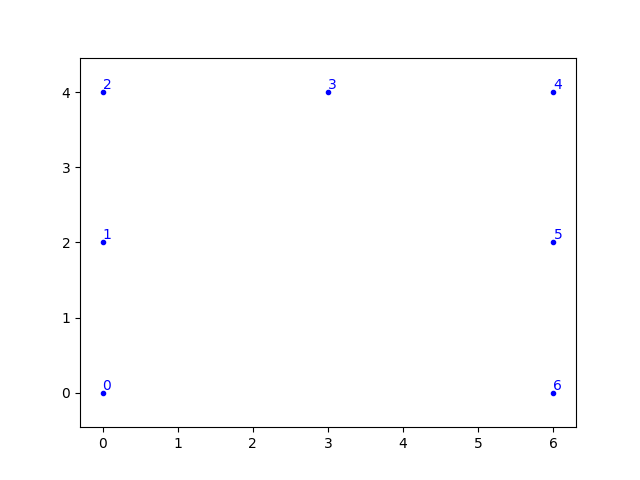

In [5]:
opsv.plot_model()

In [6]:
geomTransf('Linear', 1)
# left columns
element('elasticBeamColumn', 1, 0, 1, colA, E, colIz, 1, *massCol)
element('elasticBeamColumn', 2, 1, 2, colA, E, colIz, 1, *massCol)
# Right columns
element('elasticBeamColumn', 3, 4, 5, colA, E, colIz, 1, *massCol)
element('elasticBeamColumn', 4, 5, 6, colA, E, colIz, 1, *massCol)
# Girders
element('elasticBeamColumn', 5, 2, 3, girA, E, girIz, 1, *massGir)
element('elasticBeamColumn', 6, 3, 4, girA, E, girIz, 1, *massGir)

In [7]:
tk = 1.
t0 = 0.
dt = 0.002
n_steps = int((tk - t0)/dt)

In [8]:
timeSeries('Trig', 1, t0, tk, 1/20.8, '-factor', 15000.)
pattern('Plain', 1, 1)
load(1, 1., 0., 0.)

In [9]:
constraints('Transformation')
numberer('RCM')
test('NormDispIncr', 1.0e-6, 10, 1)
algorithm('Linear')
system('ProfileSPD')
integrator('Newmark', 0.5, 0.25)
analysis('Transient')

In [10]:
elements = getEleTags()
numElements = len(elements)
# Initialize: shape = (0, numElements, 6)
Eds = np.zeros((0, numElements, 6))
timeV = np.zeros(0)

In [ ]:
# Transient analysis loop and data collection

for step in range(n_steps):
    analyze(1, dt)
    timeV[step] = getTime()
    # Displacement data
    for el_i, ele_tag in enumerate(elements):
        node1, node2 = eleNodes(ele_tag)
        Eds[step, el_i, :] = [nodeDisp(node1)[0], nodeDisp(node1)[1], nodeDisp(node1)[2], nodeDisp(node2)[0], nodeDisp(node2)[1], nodeDisp(node2)[2]]    

NameError: name 'applied_disp' is not defined

In [ ]:
    fmt_defo = {'color': 'blue', 'linestyle': 'solid', 'linewidth': 3.0,
                'marker': '', 'markersize': 6}

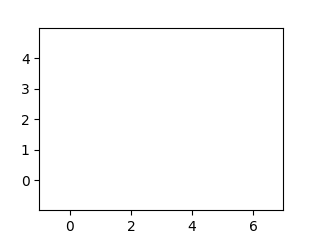

In [ ]:
sfac_a = 300.
tkt = 8.
anim = opsv.anim_defo(Eds, timeV, sfac_a, fmt_defo = fmt_defo, xlim=[-1, 7], ylim=[-1,5], fig_wi_he=(8., 6.))
plt.show()